# Formação de Ciência de Dados
### Colaboração: Adriano Santos

## Análise exploratória e preditiva do Dataset - Titanic

### Neste repositório foi realizada uma análise exploratória sobre o Naufrágio do Navio Titanic

 O desafio Titanic está disponível no site Kaggle (https://www.kaggle.com/c/titanic/overview) e teve como objetivo analisar os dados o naufrágio do RMS Titanic que ocorreu entre a noite de 14 de abril e a manhã de 15 de abril de 1912, no Atlântico Norte, quatro dias após o início de sua viagem inaugural, iniciada em Southampton, Inglaterra, com destino à cidade de Nova Iorque, nos Estados Unidos. O Titanic era o maior navio de passageiros em serviço à época, tinha 2208 pessoas a bordo quando atingiu um iceberg por volta de 23h40 (horário no navio)[a] no domingo, 14 de abril de 1912. O naufrágio aconteceu duas horas e quarenta minutos depois, às 02h20 (05h18 GMT) na segunda-feira, 15 de abril, resultando na morte de 1 496 pessoas, transformando-o em um dos desastres marítimos mais mortais. Fonte: Wikipedia.

### Conteúdo dos Dados

Foi utilizado o dataset do titanic disponivel na plataforma do kaggle
https://www.kaggle.com/c/titanic/overview

Segue abaixo a explicação de cada coluna desse Dataset:

*   **Passengerird:** Identificador único para cada passageiro;
*   **Survived:** Indica se o passageiro sobreviveu, onde (0-Não; 1-Sim)
*   **Pclass:** Classe do passageiro (1 - Primeira Classe; 2- Segunda Classe; 3- Terceira Classe;
*   **Name:** Nome do passageiro;
*   **Sex:** Sexo do passageiro;
*   **Age:** Idade do passageiro;
*   **SibSp:** Número de irmãos - esposas a bordo;
*   **Parch:** Numero de pais-filhos a  bordo;
*   **Ticket:** Número da passagem;
*   **Fare:** Preço da passagem;
*   **Cabin:** Cabine;
*   **Embarked:** Local onde o passageiro embarcou (C=Cherbourg, Q= Queenstown, S= Southampton)

### Importando e iniciando o trabalho com a base de teste do Titanic

Esse código Python é uma configuração inicial comum para análise de dados. Ele importa bibliotecas essenciais, como NumPy, Pandas, Matplotlib, Seaborn e Plotly, que são amplamente usadas em ciência de dados. Em seguida, define a formatação dos gráficos, ignora warnings para evitar mensagens de aviso, e lê dois arquivos CSV ("test.csv" e "train.csv") em DataFrames do Pandas, provavelmente para posterior análise de dados. Essa configuração é o primeiro passo em muitos projetos de ciência de dados, permitindo a manipulação e visualização dos dados de forma eficaz.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# %pip install pandas_profiling[typing_extensions]
import typing_extensions as pp
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", font_scale=1.75)

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

pp.ProfileReport(test_df).to_file("test_report.html")

### Visualizar as primeiras linhas do DataFrame (DF) com o metodo head()

O código Python apresentado é utilizado para exibir as 10 primeiras linhas de um DataFrame (DF) chamado 'train_df'. Isso é feito por meio do método 'head()', que permite especificar quantas linhas do conjunto de dados você deseja visualizar. É uma função útil para obter uma rápida visão das primeiras observações de um conjunto de dados, o que pode ser fundamental para a análise e compreensão dos dados em projetos de ciência de dados e análise de dados.

In [2]:

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Conclusão:** Analisando os dados acima, algumas coisas chamam atenção. Uma delas é que existem muitos dados que precisam ser convertidos para numericos (isso para podermos usar esses dados nos algoritmos de ML), como por exemplo o Sexo dos passageiros e a cidade de onde embarcaram. Tambem existem valores que estão em escalas muito diferentes (precisamos converter para uma escalar mais aproximada, normalizar). Além disso, percebemos colunas que contem vários 'NaN' (Not a Number)

### Visualizar as últimas linhas do DataFrame (DF) com o metodo tail()

Nesse trecho, é usado um DataFrame chamado "train_df" (provavelmente de bibliotecas como Pandas) para mostrar as últimas 10 linhas de dados. Essa função "tail(10)" exibe as informações mais recentes do DataFrame, permitindo especificar quantas linhas a serem visualizadas entre os parênteses. É útil para inspecionar os dados finais de um conjunto de dados, auxiliando na análise e identificação de tendências.

In [3]:

train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Visualizar o Dataset através de amostras aleatórias com o metodo sample()

Esse trecho de código em Python permite visualizar o conjunto de dados (Dataset) exibindo aleatoriamente 10 amostras. Ao utilizar a função "sample(10)", você pode ajustar o número entre parênteses para determinar quantos dados deseja visualizar aleatoriamente, facilitando a análise de uma parcela do conjunto de dados em questão.

In [4]:

train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S


### Avaliando os valores nulos

Esse código Python realiza uma avaliação de valores nulos em um DataFrame chamado 'test_df'. Ele verifica se há algum valor nulo em qualquer linha do DataFrame e retorna as linhas que contêm pelo menos um valor nulo. Isso é útil para identificar e lidar com dados ausentes em um conjunto de dados, facilitando a limpeza e a análise de informações.

In [238]:

test_df[test_df.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###  Exibir informações resumidas sobre os dados contidos no DataFrame

O código Python acima é uma chamada ao método "info()" aplicado a um DataFrame chamado "train_df". Ele é usado para exibir informações resumidas sobre os dados contidos no DataFrame, incluindo o número de entradas, colunas, o nome das colunas e o tipo de dado em cada coluna. É uma ferramenta útil para futuros profissionais que desejam compreender a estrutura e o tipo de dados em um conjunto de dados de forma rápida e simples.

In [5]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Conclusão:** O DataFrame apresentado acima, possui 891 entradas e 12 colunas. As colunas representam diferentes características dos passageiros do Titanic, como o número de identificação do passageiro, se o passageiro sobreviveu ou não, a classe em que o passageiro viajou, o nome do passageiro, o sexo do passageiro, a idade do passageiro, o número de irmãos/cônjuges a bordo, o número de pais/filhos a bordo, o número do bilhete do passageiro, a tarifa paga pelo passageiro, a cabine em que o passageiro ficou e o porto de embarque

### Exibir os nomes das colunas em ordem contidos no DataFrame

Esse código Python simples exibe os nomes das colunas de um DataFrame chamado "train_df" na ordem em que estão organizados. É uma operação básica para entender a estrutura do conjunto de dados, útil para futuros profissionais que desejam analisar ou manipular os dados em projetos de análise de dados ou aprendizado de máquina.

In [6]:

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Exibir a quantidade de linhas e colunas dos dados no DataFrame

O código Python apresentado utiliza o método 'shape' para exibir as dimensões dos dados contidos no DataFrame 'train_df', ou seja, a quantidade de linhas e colunas. Isso é essencial para futuros profissionais da área de análise de dados, pois permite compreender a estrutura do conjunto de dados, facilitando a manipulação e análise posterior.

In [7]:

train_df.shape

(891, 12)

### Verificar se há dados duplicados no conjunto de treinamento e DataFrame

Esse trecho de código Python verifica se há dados duplicados em um conjunto de dados chamado 'train_df'. Ele faz isso usando a função 'duplicated()' que retorna uma série booleana, indicando quais linhas estão duplicadas. A seguir, '.sum()' conta quantas duplicatas existem, retornando o total. Essa verificação é útil para garantir a qualidade dos dados, especialmente ao lidar com análises e modelagem de machine learning, pois duplicatas podem afetar os resultados.

In [8]:

train_df.duplicated().sum()

0

### Exibir informações estatísticas resumidas sobre o DataFrame

Esse código Python realiza uma operação de resumo estatístico em um DataFrame chamado 'train_df'. Utilizando o método 'describe()', ele gera estatísticas como média, desvio padrão, valores mínimo e máximo, quartis e contagem para as colunas numéricas do conjunto de dados, fornecendo uma visão rápida e resumida das características estatísticas dos dados, o que é fundamental para futuros profissionais que desejam entender e analisar conjuntos de dados de forma eficaz.

In [277]:

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.906637,0.601800
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,1.614703,0.489803
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [278]:
round(train_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
count,889.0,889.0,889.0,712.0,889.0,889.0,889.0,889.0,889.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0,1.0,1.0
std,257.0,0.0,1.0,14.0,1.0,1.0,50.0,2.0,0.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0,0.0,0.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0,0.0,1.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0,1.0,1.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0,10.0,1.0


**Conclusão:** No quadro acima podemos perceber que cerca de 38% do conjunto de treino sobreviveram ao desastre do Titanic e que as idades dos passageiros neste conjunto varia de 0.42 a 80 anos

### Exibir informações estatísticas resumidas e invertida sobre o DataFrame 

No comando "train_df.describe().transpose()", estamos utilizando o DataFrame "train_df" para calcular estatísticas descritivas, como média, desvio padrão, mínimo e máximo, para cada coluna de dados. O método "transpose()" é empregado para girar o resultado, tornando as estatísticas descritivas mais legíveis com as colunas representando as estatísticas e as linhas correspondendo às variáveis do conjunto de treinamento. Esse processo ajuda na análise rápida e eficaz das características dos dados.

In [279]:

train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,712.0,29.642093,14.492933,0.42,20.0000,28.0000,38.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292
Family_Size,889.0,0.906637,1.614703,0.00,0.0000,0.0000,1.0,10.0000
Alone,889.0,0.601800,0.489803,0.00,0.0000,1.0000,1.0,1.0000


In [280]:
round(train_df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.0,257.0,1.0,224.0,446.0,668.0,891.0
Survived,889.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Pclass,889.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0
Age,712.0,30.0,14.0,0.0,20.0,28.0,38.0,80.0
SibSp,889.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
Parch,889.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
Fare,889.0,32.0,50.0,0.0,8.0,14.0,31.0,512.0
Family_Size,889.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0
Alone,889.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


**Conclusão:** A variável age (idade) tem como valor máximo 80, o que é impossível. Na época do naufrágio do Titanic (1912), a expectativa de vida era em torno de 52 anos. Uau, achei assustador pensar em 52 anos para o máximo de vida e o pior de tudo, se olharmos para o Brasil na mesma época, a expectativa era de 35 anos! Vamos ter trabalho com os outliers!
Quanto a coluna fare (valor do ticket pago pela passagem) temos outliers distorcendo a distribuição dos valores desta variável, puxando a média para 32,09 sendo que a mediana esta em 14,45!

### Verificar a presença de dados faltantes nas colunas dos conjuntos de dados de treinamento

O código verifica se há dados ausentes em cada coluna do conjunto de treinamento (train_df) e, em seguida, soma a quantidade de valores nulos em cada coluna. Em seguida, classifica essas somas em ordem decrescente (do maior para o menor) para identificar as colunas com mais dados faltantes. Isso é útil para entender a integridade dos dados e decidir como lidar com valores ausentes em análises ou modelagem de dados.

In [10]:

train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


As informações resultantes do código acima indicam que as colunas Cabin e Age possuem o maior número de valores ausentes, com 687 e 177, respectivamente. A coluna Embarked possui apenas 2 valores ausentes. Todas as outras colunas não possuem valores ausentes. 
- A coluna Cabin representa o número da cabine do passageiro. 
- A coluna Age representa a idade do passageiro. 
- A coluna Embarked representa o porto de embarque do passageiro.

###  Verificar a porcentagem de valores em Branco em cada coluna

Esse código Python é usado para calcular a porcentagem de valores em branco em cada coluna de um DataFrame chamado 'train_df'. Ele faz isso usando 'train_df.isnull().sum()' para contar os valores nulos em cada coluna e, em seguida, divide esse número pelo comprimento do DataFrame ('len(train_df)') e multiplica por 100.0 para obter a porcentagem. Isso é útil para identificar a integridade dos dados e para tratamento de valores ausentes em análises de dados.

In [271]:

(train_df.isnull().sum() / len(train_df)) * 100.0

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
Family_Size     0.000000
Alone           0.000000
dtype: float64

**Conclusão:** Podemos verificar a partir do análise das informações acima, o banco de dados mostra que 77% dos passageiros não aparece a informação em que cabine os mesmos estariam localizados, vamos dessa forma, descartar essa coluna

### Percentual de dados faltantes na base de Treino

Esse código Python calcula o percentual de dados ausentes na base de treinamento (train_df), arredondando o resultado para duas casas decimais. Ele utiliza a função isnull() para identificar valores faltantes em cada coluna e, em seguida, multiplica por 100 para obter a porcentagem. O round() é usado para limitar o resultado a duas casas decimais, tornando mais claro o entendimento da quantidade de dados ausentes em cada coluna.

In [272]:

round(train_df.isnull().mean() * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.91
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
Family_Size     0.00
Alone           0.00
dtype: float64

### Remover uma coluna desse DataFrame

Nesse código Python, estamos trabalhando com um DataFrame chamado 'train_df'. A primeira linha remove a coluna 'Cabin' desse DataFrame, garantindo que ela não faça parte dos dados de treinamento. Em seguida, a função 'info()' é chamada para exibir informações sobre o DataFrame, como o número de linhas, colunas e informações sobre os tipos de dados em cada coluna. Essa operação é útil para análise de dados, pré-processamento e limpeza, comum na preparação de dados para treinamento de modelos de aprendizado de máquina.

In [12]:

train_df.drop('Cabin', axis='columns', inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Remover as linhas com valores ausentes e calcular o percentual de valores nulos

No código Python fornecido, a primeira linha elimina as linhas do DataFrame 'train_df' em que a coluna 'Embarked' possui valores ausentes (NaN). Na segunda linha, calculamos a porcentagem de valores nulos em todo o DataFrame 'train_df'. Esse código é útil para a limpeza de dados, eliminando linhas com informações ausentes e fornecendo uma visão geral da porcentagem de valores nulos no DataFrame.

In [236]:

train_df.dropna(subset=['Embarked'], inplace=True)
(train_df.isnull().sum() / len(train_df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
Family_Size     0.000000
Alone           0.000000
dtype: float64

### Analizando a probabilidade de sobrevivência pelo Sexo

Esse código Python analisa a probabilidade de sobrevivência com base no sexo dos passageiros em um conjunto de dados chamado 'train_df'. Ele seleciona as colunas 'Sex' e 'Survived', agrupa os dados pelo sexo e, em seguida, calcula a média de sobrevivência para cada sexo. Isso fornece uma visão simples da taxa de sobrevivência média para passageiros do sexo masculino e feminino.

In [255]:

train_df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.740385
male,0.188908


# **> Realizar o Análise Exploratória do Titanic**

### Elaborando Histograma para mostrar a faixa de idade dos passageiros

Neste código Python, estamos criando um histograma que representa a distribuição das idades dos passageiros. Primeiro, definimos o tamanho do gráfico e o estilo visual. Em seguida, configuramos o título do gráfico. Utilizamos a biblioteca Matplotlib para plotar o histograma dos dados de idade contidos no dataframe "train_df". As informações de eixo x e y são definidas para representar as faixas de idade e o número de passageiros, respectivamente. O gráfico é salvo como uma imagem chamada "histograma_idade.png". Além disso, adicionamos uma anotação no canto inferior direito, indicando que a análise foi realizada por '@Adriano Santos'. Por fim, exibimos o histograma. Este código é usado para visualizar a distribuição das idades dos passageiros de forma clara e eficaz.

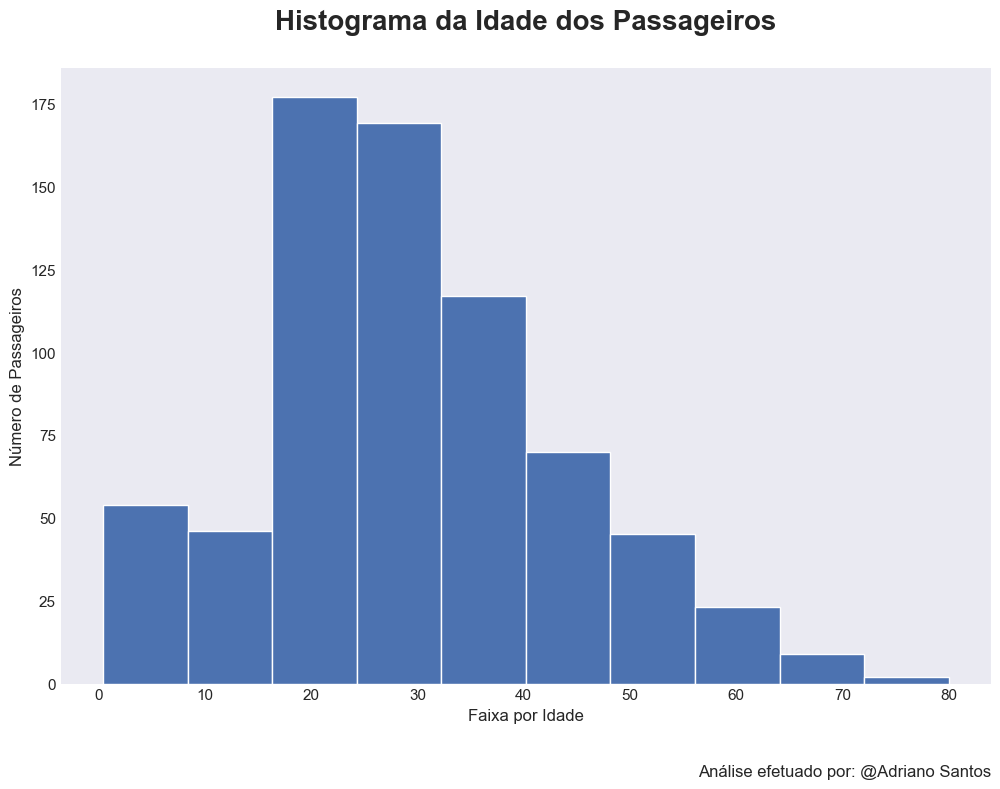

In [216]:

# Definição do tamanho do gráfico e estilo
plt.figure( figsize=(12, 8) )
plt.style.use('seaborn-dark')

# # Configurações do título do grafico
plt.title('Histograma da Idade dos Passageiros\n', fontsize=20, fontweight='bold')

# Plotagem do histograma
plt.hist(train_df.Age)
plt.xlabel('Faixa por Idade')
plt.ylabel('Número de Passageiros')

# Salvando a imagem
plt.savefig('histograma_idade.png')

# Adicionando anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

# Exibindo o histograma
plt.show()

**Conclusão:** O maior volume de passageiros estava entre as idades de 20 a 40 anos

### Analisar a taxa de sobreviventes & não sobreviventes por sexo

Nesse código Python, um gráfico de contagem de sobreviventes por sexo está sendo criado usando a biblioteca Seaborn e Matplotlib. A figura do gráfico é definida com um tamanho de 12 por 8 polegadas e um estilo "seaborn-dark" é aplicado. O gráfico em si é um countplot que exibe o número de sobreviventes e não sobreviventes divididos por sexo, usando os dados do DataFrame 'train_df'. Uma legenda é adicionada no canto superior direito, os rótulos dos eixos são configurados, e o gráfico é salvo como 'sobreviventes_por_sexo.png'. Um título é adicionado ao gráfico e uma anotação com o autor é colocada no canto inferior direito. Por fim, o gráfico é exibido.

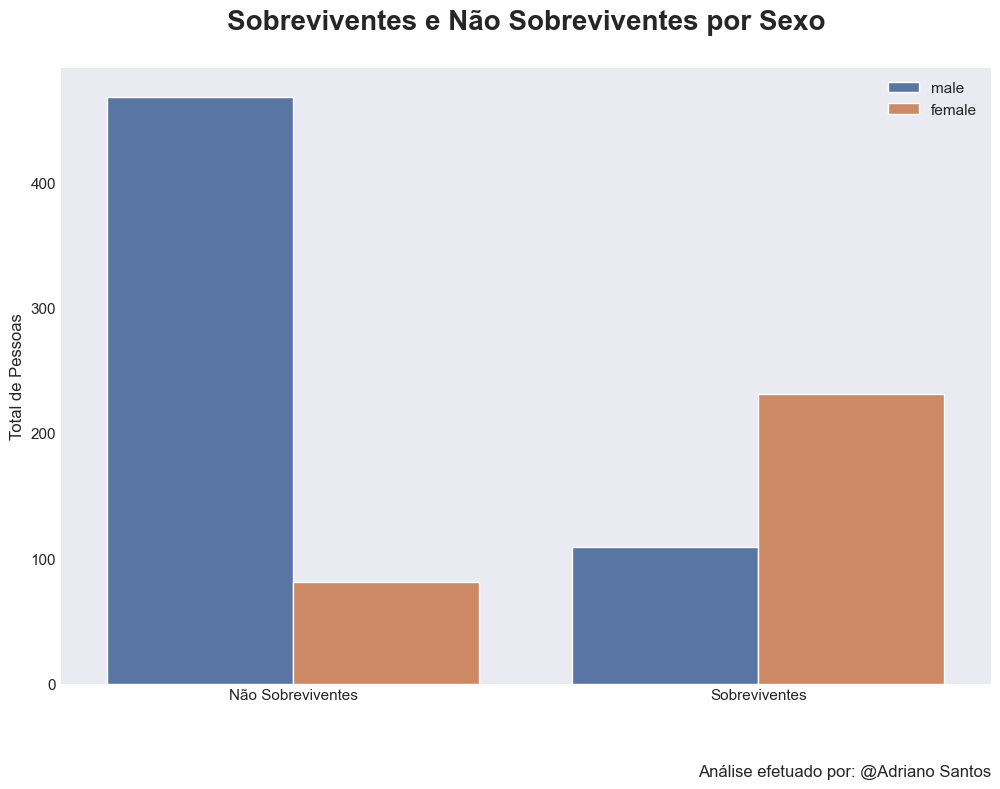

In [217]:

# Definição do tamanho da figura
plt.figure( figsize=(12, 8) )

# Definição do estilo
plt.style.use('seaborn-dark')

# Criação do gráfico de contagem de sobreviventes por sexo
g = sns.countplot(x='Survived', hue='Sex', data=train_df)

# Adição da legenda no canto superior direito
plt.legend(loc='upper right')

# Configuração dos rótulos dos eixos
g.set(ylabel="Total de Pessoas", xlabel="", xticklabels=["Não Sobreviventes", "Sobreviventes"])

# Salvando a figura em um arquivo
plt.savefig('sobreviventes_por_sexo.png')

# Adição do título ao gráfico
plt.title('Sobreviventes e Não Sobreviventes por Sexo\n', fontsize=20, fontweight='bold')

# Adição de anotação com o autor
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

# Exibindo o histograma
plt.show()

**Conclusão:** Podemos notar no gráfico acima, que no grupo dos homens estão no grupo dos "não sobreviventes" é muito maior que as mulheres. Então começamos a verificar a teoria que "primeiro salvar as mulheres e crianças começa a fazer sentido". Mas precisamos realizar outras análises para que possamos verificar se essa teoria se confirma.

### Analisar os Sobreviventes & os não sobreviventes por faixa de idade

Nesse código Python, um histograma é criado para analisar a distribuição das idades dos passageiros em um conjunto de dados. Os dados são divididos em duas categorias, 'Sobreviventes' e 'Não-Sobreviventes', representadas pelas cores verde e vermelho, respectivamente. O gráfico mostra a quantidade de passageiros em cada faixa etária (30 bins) e fornece informações visuais sobre como a idade pode estar relacionada à sobrevivência. Além disso, uma anotação com o nome do autor (Adriano Santos) é inserida no canto inferior direito do gráfico. Por fim, o histograma é salvo como 'idade_sobreviventes.png' e exibido na tela.

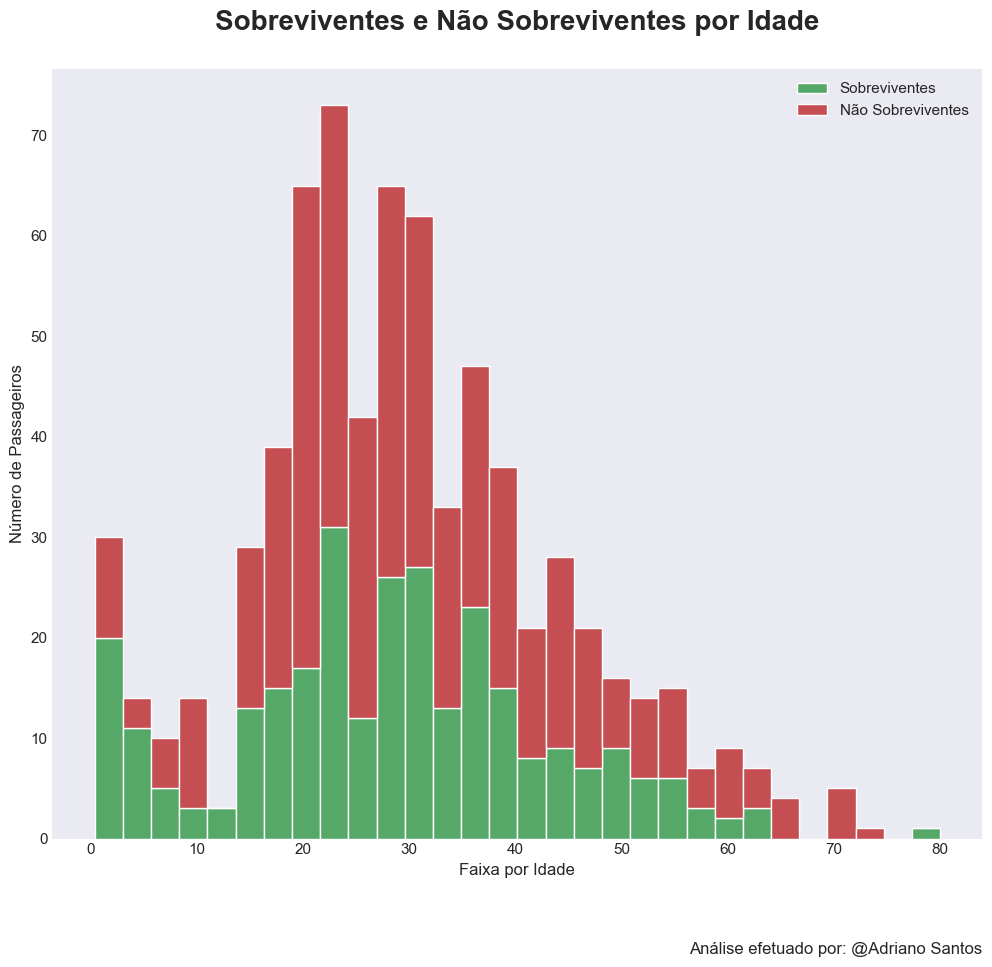

In [218]:

# Definição do tamanho da figura e estilo
plt.figure(figsize=(12, 10))
plt.style.use('seaborn-dark')

# Criação da figura
plt.hist([train_df[train_df['Survived'] == 1]['Age'], train_df[train_df['Survived'] == 0]['Age']],
          stacked=True, color=['g', 'r'], bins=30, label=['Sobreviventes', 'Não Sobreviventes'])
plt.xlabel('Faixa por Idade')
plt.ylabel('Número de Passageiros')
plt.title('Sobreviventes e Não Sobreviventes por Idade\n', fontsize=20, fontweight='bold')
plt.legend()

# Anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.15), xycoords='axes fraction', ha='right', fontsize=12
)

# Salvando a figura
plt.savefig('idade_sobreviventes.png')

# Exibindo o histograma
plt.show()

### Análise de correlação entre as variáveis

Esse código Python realiza uma análise de correlação entre as variáveis de um conjunto de dados chamado 'train_df'. Ele calcula a matriz de correlação das variáveis, formata os valores para duas casas decimais e aplica um esquema de cores para destacar os padrões de correlação, com cores mais quentes indicando correlações mais fortes. Isso ajuda a visualizar as relações entre as variáveis de forma rápida e eficaz.

In [252]:

train_df.corr().style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
PassengerId,1.0,-0.005,-0.035,0.034,-0.058,-0.0017,0.013,-0.04,0.058
Survived,-0.005,1.0,-0.34,-0.082,-0.034,0.083,0.26,0.018,-0.21
Pclass,-0.035,-0.34,1.0,-0.37,0.082,0.017,-0.55,0.064,0.14
Age,0.034,-0.082,-0.37,1.0,-0.31,-0.19,0.093,-0.3,0.2
SibSp,-0.058,-0.034,0.082,-0.31,1.0,0.41,0.16,0.89,-0.58
Parch,-0.0017,0.083,0.017,-0.19,0.41,1.0,0.22,0.78,-0.58
Fare,0.013,0.26,-0.55,0.093,0.16,0.22,1.0,0.22,-0.27
Family_Size,-0.04,0.018,0.064,-0.3,0.89,0.78,0.22,1.0,-0.69
Alone,0.058,-0.21,0.14,0.2,-0.58,-0.58,-0.27,-0.69,1.0


### Analisar o histograma das variáveis numéricas

Esse código Python realiza uma análise visual dos dados, plotando histogramas das variáveis numéricas contidas no DataFrame 'train_df'. A função 'hist' é usada para criar os gráficos, e o parâmetro 'figsize' define o tamanho da figura. Esses histogramas são úteis para compreender a distribuição das variáveis e identificar padrões, como tendências centrais e dispersões nos dados.

Text(1, -0.3, 'Análise efetuado por: @Adriano Santos')

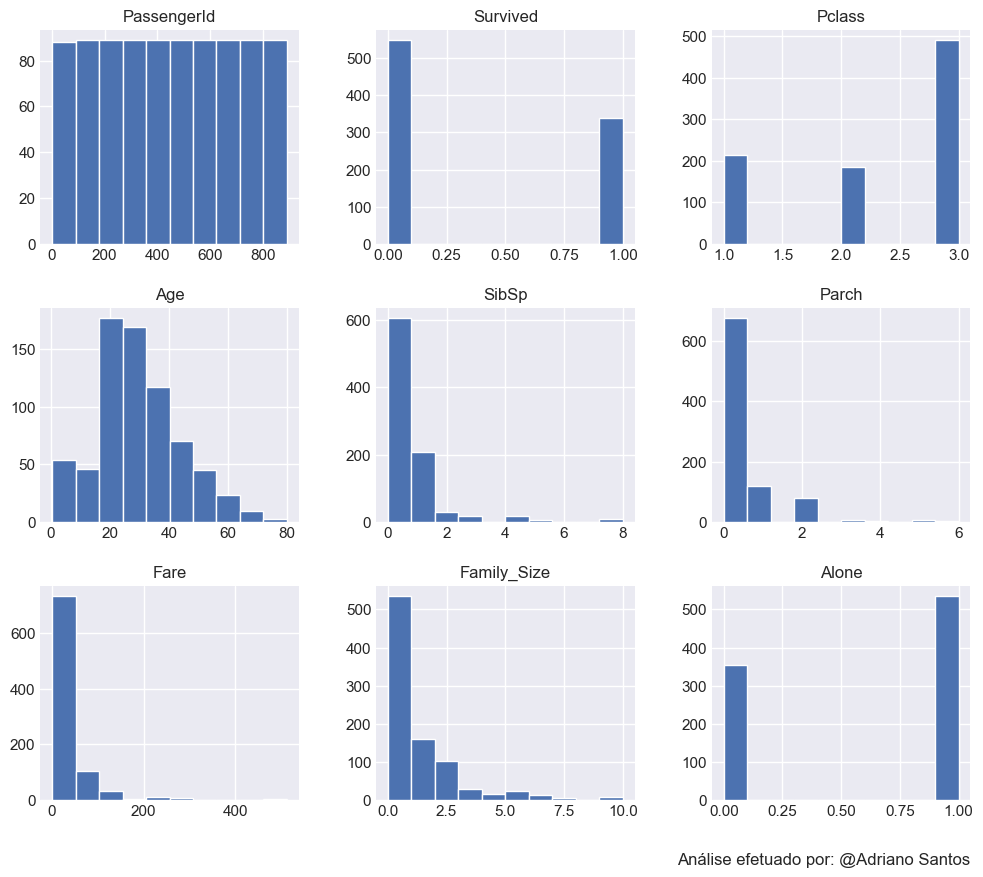

In [225]:

train_df.hist(figsize=(12, 10))

# Anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
)

### Analisando os grupos que tiveram mais chance de sobrevivência

Neste código Python, estamos criando um gráfico de barras com três subplots que representam a relação entre diferentes variáveis e as chances de sobrevivência em um conjunto de dados chamado 'train_df'. O primeiro subplot mostra a relação entre o gênero ('Sex') e a sobrevivência ('Survived'), o segundo subplot mostra a relação entre a classe da passagem ('Pclass') e a sobrevivência, e o terceiro subplot mostra a relação entre o porto de embarque ('Embarked') e a sobrevivência. Utilizamos a biblioteca Seaborn para criar o gráfico e definimos o estilo 'seaborn-dark' para ele. O resultado é uma visualização que ajuda a entender quais grupos têm mais chances de sobreviver, de acordo com as variáveis apresentadas. O tamanho da figura e o título também são configurados para melhor apresentação.

<Figure size 1500x1000 with 0 Axes>

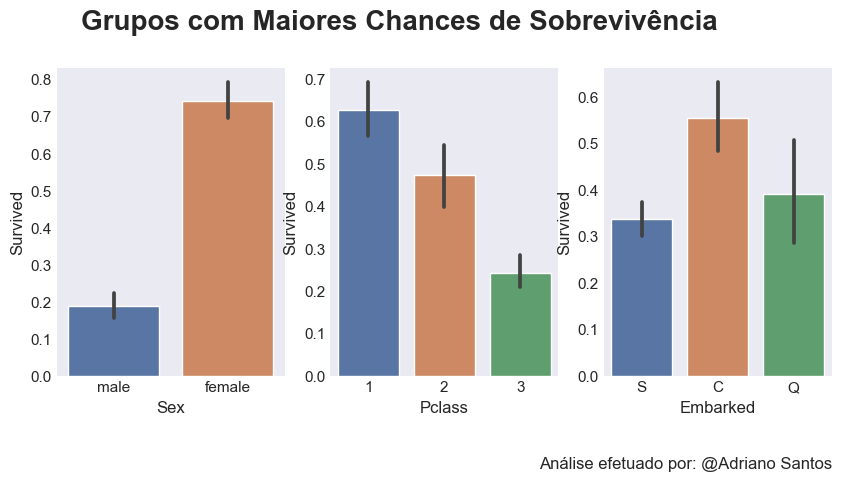

In [224]:

# Configura o tamanho da figura
plt.figure(figsize=(15, 10))

# Define o estilo do gráfico
plt.style.use('seaborn-dark')

# Cria três subplots
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))

# Define o título do gráfico
plt.title('Grupos com Maiores Chances de Sobrevivência\n', fontsize=20, fontweight='bold', ha='right')

# Plota o primeiro gráfico de barras
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)

# Plota o segundo gráfico de barras
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)

# Plota o terceiro gráfico de barras
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3)

# Anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
)

# Exibe o gráfico
plt.show()

**Conclusão:** Pelo gráfico acima já conseguimos confirmar duas suposições iniciais:

- As mulheres tiveram muito mais chances de sobreviver que os homens (75% vs. 18%)
- Os passageiros que embarcaram na primeira classe tiveram mais de 60% de chance de sobreviver versus a terceira classe que teve um pouco mais de 20% de sobreviver.
- Os passageiros que embarcaram na cidade de Cherbourg tiveram 60% de chance de sobreviver, enquanto quem embarcou em Queenstown teve 40% de chances de sobreviver e quem embarcou em Southampton tiveram somente 20% de sobreviver.

### Distribuição das idades dos Sobreviventes & Mortos

Neste código Python, estamos criando um gráfico de distribuição de idades (Age) com base nos dados de um DataFrame chamado 'train_df'. Primeiro, definimos o tamanho do gráfico e aplicamos um estilo específico. Em seguida, criamos um FacetGrid separando os dados pela coluna 'Survived', que representa se as pessoas sobreviveram ou não. O gráfico resultante mostra a distribuição de idades para cada categoria de sobrevivência. Além disso, adicionamos uma anotação no canto inferior direito do gráfico com o nome do autor da análise. Por fim, o gráfico é exibido na tela. É uma visualização que ajuda a entender como a idade está distribuída entre os sobreviventes e não sobreviventes.

<Figure size 3000x1000 with 0 Axes>

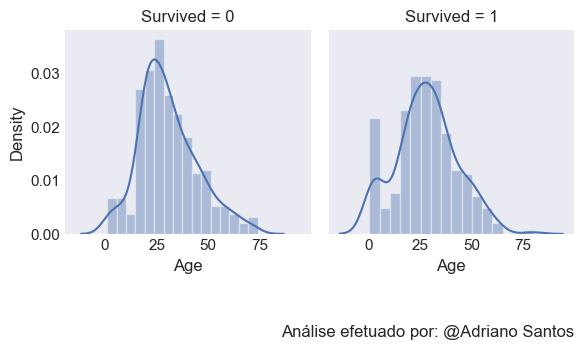

In [227]:

# Definindo o tamanho do gráfico e aplicando o estilo
plt.figure(figsize=(30, 10))
plt.style.use('seaborn-dark')

# Criando um FacetGrid com base no DataFrame 'train_df' e separando por 'Survived'
age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.distplot, 'Age')

# Adicionando a anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.50),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exibindo o gráfico
plt.show()

**Conclusão:** Quando analisamos a distribuição das idades dos sobreviventes e mortos, podemos verificar que temos um pico no lado dos sobreviventes para crianças pequenas. O comportamento dos dois gráficos é bem parecido, mas esse detalhe é bem importante pois confirma a hipótese que crianças também tem maior chance de sobreviverem, conforme relata a hipótese: “Mulheres e Crianças são resgatadas primeiro”.

### Elaboração de um histograma para cada atributo

Neste código Python, definimos as colunas a serem usadas, que são 'Parch', 'SibSp', 'Age' e 'Pclass'. Em seguida, configuramos o tamanho da figura para a visualização do gráfico e escolhemos o estilo 'seaborn-dark'. A matriz de dispersão é criada usando essas colunas do DataFrame 'train_df'. O gráfico resultante é salvo como 'variaveis.png'. Uma anotação é adicionada na parte inferior direita do gráfico com a informação "Análise realizada por: @Adriano Santos". Por fim, o gráfico é exibido. Este código é útil para visualizar as relações entre as variáveis ​​selecionadas em um gráfico de dispersão.

<Figure size 1500x800 with 0 Axes>

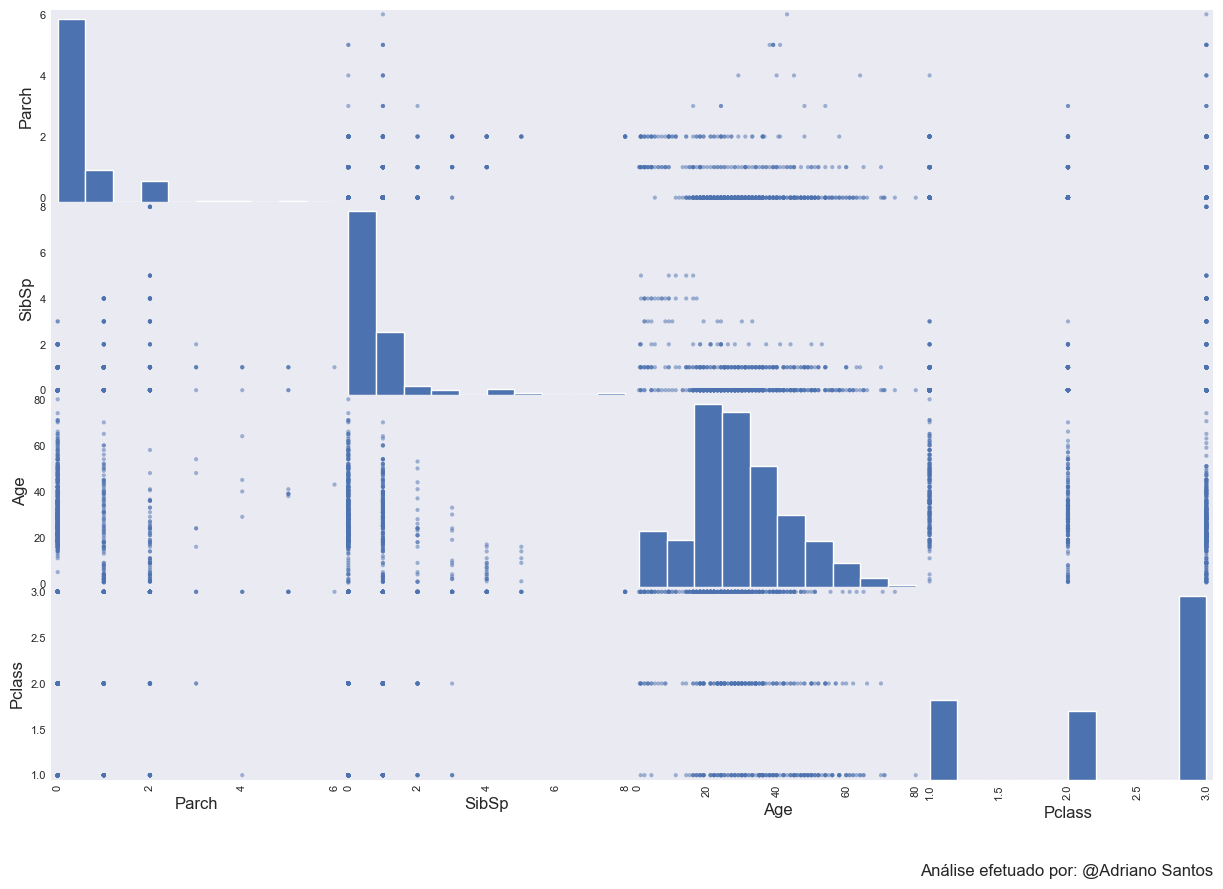

In [211]:

# Define as colunas a serem usadas
columns = ['Parch', 'SibSp', 'Age', 'Pclass']

# Configura o tamanho da figura
plt.figure(figsize=(15, 8))

# Define o estilo do gráfico
plt.style.use('seaborn-dark')

# Cria a matriz de dispersão
pd.plotting.scatter_matrix(train_df[columns], figsize=(15, 10))

# Salva a imagem
plt.savefig('variaveis.png')

# Adiciona uma anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.50),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exibe o gráfico
plt.show()

**Conclusão:** Na exibição de um histograma de cada atributo, conseguimos verificar que, por exemplo, as pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe.

# > Correlacionar as variáveis: Idade, Custo do Ticket e Sobreviventes

### Criando gráfico de dispersão com uma regressão linear

Nesse código Python, estamos criando um gráfico de dispersão com uma regressão linear. Primeiro, definimos o tamanho da figura como 15x8. Em seguida, aplicamos um estilo específico. O gráfico de dispersão é gerado com base nos dados contidos em 'train_df', onde 'Age' está no eixo x, 'Fare' no eixo y e a cor dos pontos é determinada pela coluna 'Survived'. Não é exibida uma linha de regressão. O título do gráfico é "Sobreviventes & Preço do Ticket", e o gráfico é salvo como um arquivo de imagem chamado 'sobreviventes_preco_ticket.png'. Há uma anotação no canto inferior direito com a informação do autor. Por fim, o gráfico é exibido.

<Figure size 1500x800 with 0 Axes>

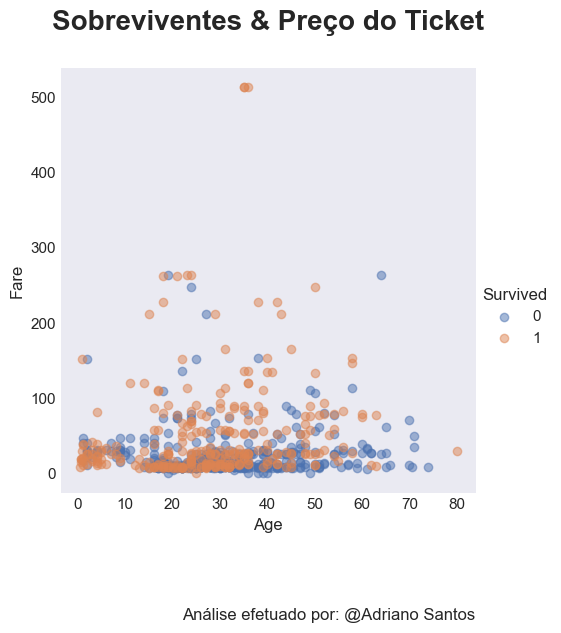

In [235]:

# Configuração do tamanho da figura
plt.figure(figsize=(15, 8))

# Definição do estilo
plt.style.use('seaborn-dark')

# Criação do gráfico de dispersão com regressão linear
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_df, fit_reg=False, scatter_kws={'alpha': 0.5})

# Título do gráfico
plt.title('Sobreviventes & Preço do Ticket\n', fontsize=20, fontweight='bold')

# Salvando a figura como um arquivo de imagem
plt.savefig('sobreviventes_preco_ticket.png')

# Anotação no gráfico
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
)

# Exibição do gráfico
plt.show()

**Conclusão:** Podemos notar nessa análise que os sobreviventes pagaram preços mais baixos de ticket e outro ponto importante, os passageiros poderiam ser mais jovens que os demais passageiros.

### Análises de sobreviventes e não sobreviventes por gênero

O código Python acima cria um gráfico de barras empilhadas para analisar a relação entre sobreviventes e sexo em um conjunto de dados. Primeiro, configura o tamanho e o estilo do gráfico. Em seguida, filtra os dados para contar quantos sobreviventes e não sobreviventes há para cada sexo. Os resultados são organizados em um DataFrame e, em seguida, é gerado um gráfico de barras empilhadas. O gráfico é salvo em um arquivo chamado 'sobreviventes_preco_ticket.png', recebe um título, e inclui uma anotação para indicar o autor da análise. Por fim, o gráfico é exibido. É uma visualização útil para entender como o gênero pode ter influenciado a sobrevivência no contexto dos dados analisados.

<Figure size 1200x800 with 0 Axes>

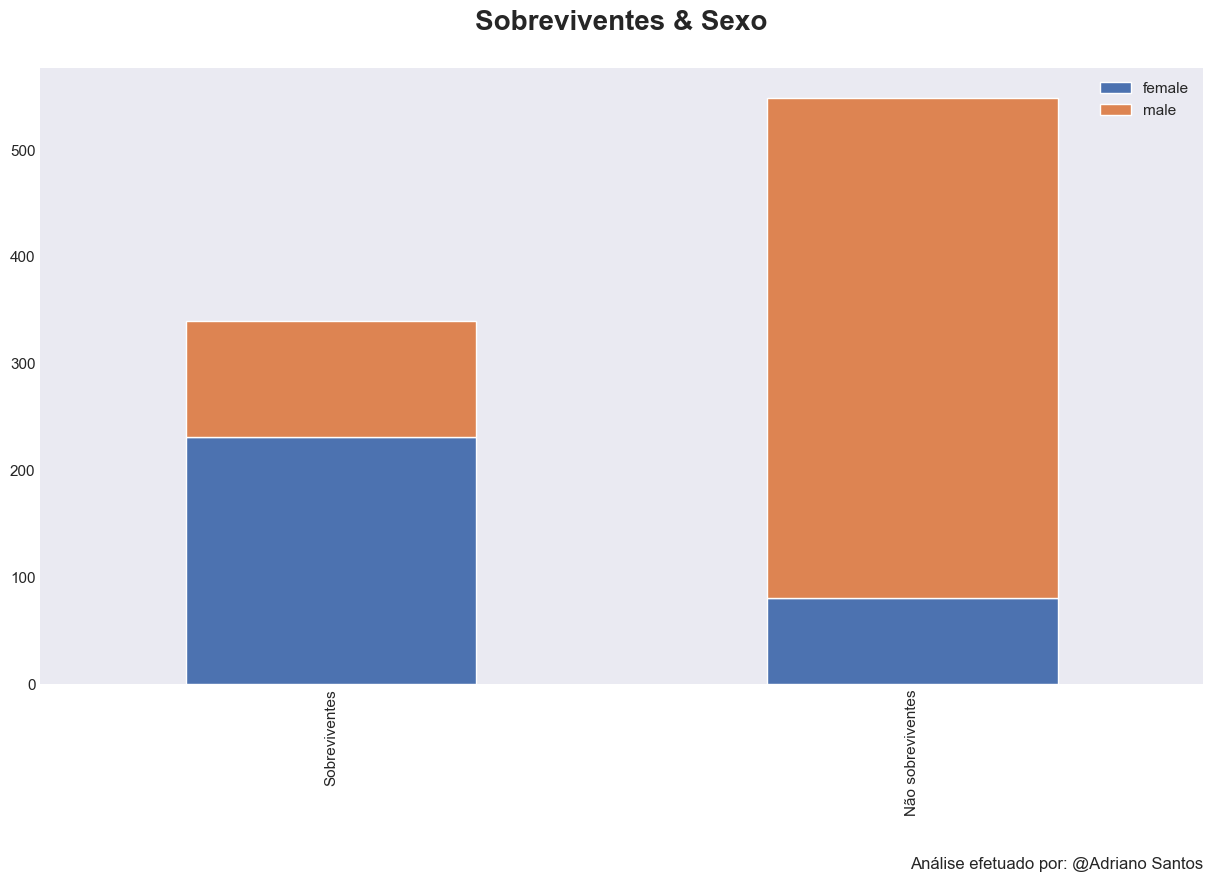

In [234]:

# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 8))

# Configuração do estilo
plt.style.use('seaborn-dark')

# Filtragem dos dados
survived_sex = train_df[train_df['Survived'] == 1]['Sex'].value_counts()
dead_sex = train_df[train_df['Survived'] == 0]['Sex'].value_counts()

# Criação do DataFrame
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Sobreviventes', 'Não sobreviventes']

# Plotagem do gráfico de barras empilhadas
df.plot(kind='bar', stacked=True, figsize=(15, 8))

# Salvar a figura
plt.savefig('sobreviventes_preco_ticket.png')

# Configuração do título
plt.title('Sobreviventes & Sexo\n', fontsize=20, fontweight='bold')

# Anotação no gráfico
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
)

# Exibição do gráfico
plt.show()

### Análise entre sobreviventes e não sobreviventes sob o item "Preço do Ticket"

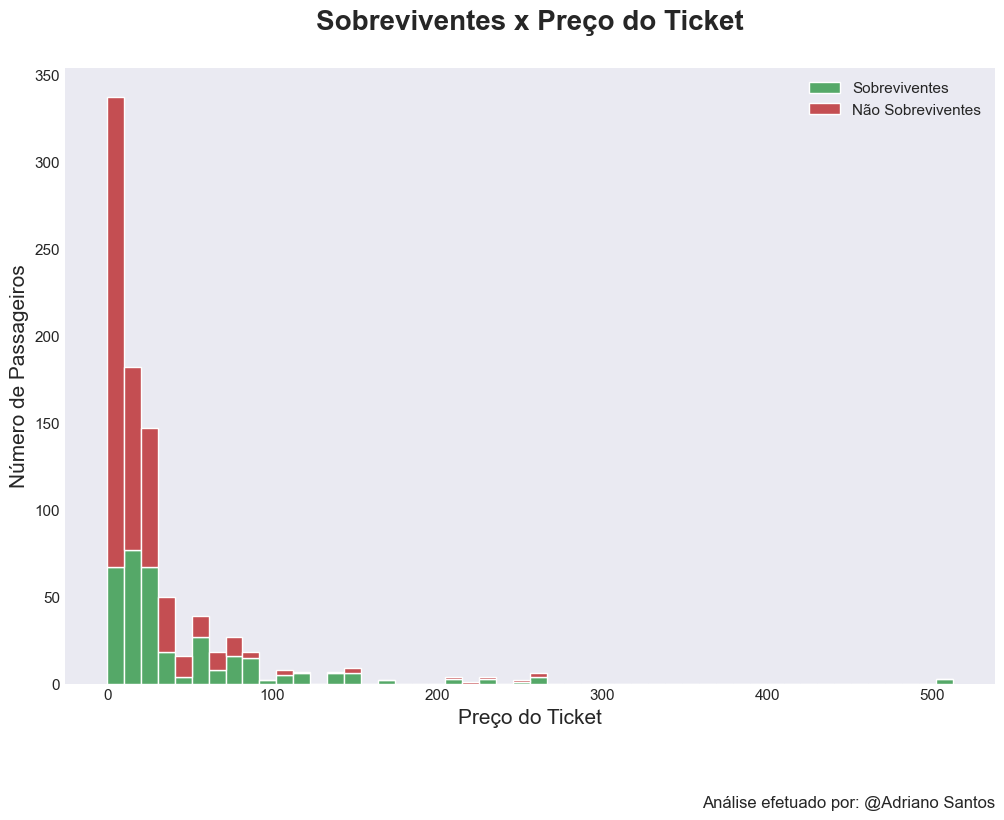

In [233]:

# Cria a figura com o tamanho desejado
plt.figure(figsize=(12, 8))

# Filtra os dados para os sobreviventes e não sobreviventes
fare_sobreviventes = train_df[train_df['Survived'] == 1]['Fare']
fare_nao_sobreviventes = train_df[train_df['Survived'] == 0]['Fare']

# Plota o histograma empilhado
plt.hist([fare_sobreviventes, fare_nao_sobreviventes], stacked=True, color=['g', 'r'], bins=50, label=['Sobreviventes', 'Não Sobreviventes'])

# Define rótulos dos eixos x e y
plt.xlabel('Preço do Ticket', fontsize=15)
plt.ylabel('Número de Passageiros', fontsize=15)

# Salva a figura em um arquivo
plt.savefig('sobreviventes_preco_ticket.png')

# Define o título do gráfico
plt.title('Sobreviventes x Preço do Ticket\n', fontsize=20, fontweight='bold')

# Adiciona uma anotação
plt.annotate(
    'Análise efetuado por: @Adriano Santos',
    xy=(1, -0.20),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()

**Conclusão:** Os gráfico acima indica que o maior número de passageiros que sobreviveram pagaram um preço de passagem entre $0 a $100 doláres. Sendo que os maiores volumes poderiamos destacar que foram entre $0 a $30 doláres

### Verificando a chance de sobrevivência sob o contexto de tamanho de família

<Figure size 1500x800 with 0 Axes>

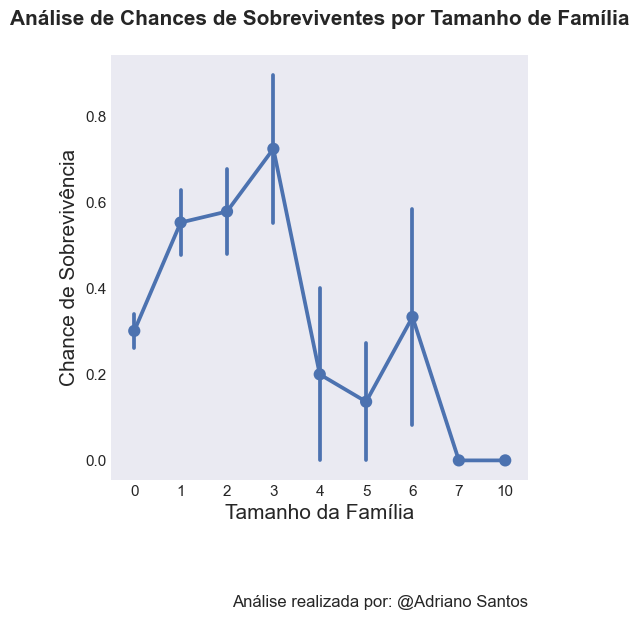

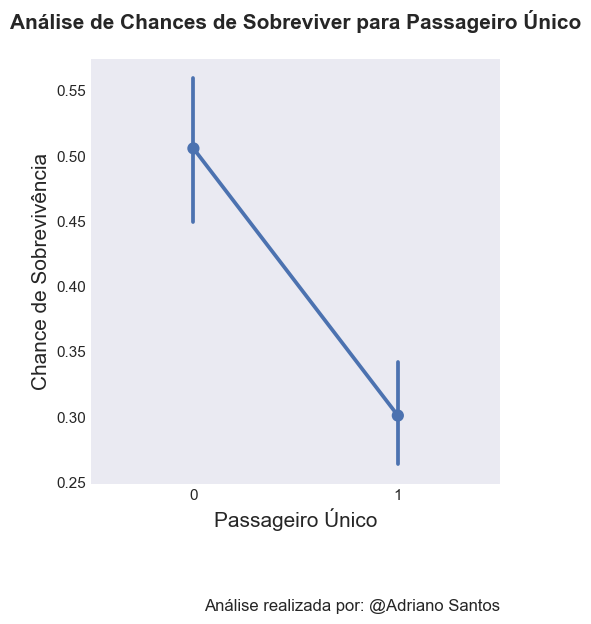

In [232]:

# Configuração do tamanho e estilo do gráfico
plt.figure(figsize=(15, 8))
plt.style.use('seaborn-dark')

# Adicionando as colunas "Family_Size" e "Alone"
train_df['Family_Size'] = train_df['Parch'] + train_df['SibSp']
train_df['Alone'] = 0
train_df.loc[train_df['Family_Size'] == 0, 'Alone'] = 1

# Plotando gráfico de "Family_Size"
sns.catplot(x="Family_Size", y="Survived", data=train_df, kind="point")

# Configuração do título e rótulos
plt.title('Análise de Chances de Sobreviventes por Tamanho de Família\n', fontsize=15, fontweight='bold')
plt.xlabel('Tamanho da Família', fontsize=15)
plt.ylabel('Chance de Sobrevivência', fontsize=15)

# Anotação do autor
plt.annotate(
    'Análise realizada por: @Adriano Santos',
    xy=(1, -0.30),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exibição do gráfico
plt.show()

# Plotando gráfico de "Alone"
sns.catplot(x='Alone', y='Survived', data=train_df, kind='point')

# Configuração do título e rótulos
plt.title('Análise de Chances de Sobreviver para Passageiro Único\n', fontsize=15, fontweight='bold')
plt.xlabel('Passageiro Único', fontsize=15)
plt.ylabel('Chance de Sobrevivência', fontsize=15)

# Anotação do autor
plt.annotate(
    'Análise realizada por: @Adriano Santos',
    xy=(1, -0.30),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exibição do gráfico
plt.show()

**Conclusão:** O termo "Family_Size" mostra o número de pessoas na família de um passageiro. 
A coluna "Alone" foi adicionada para verificar as chances de sobrevivência de um passageiro solitário em comparação com um passageiro que possui família.
Dessa forma podemos concluir que:
- Se um passageiro estiver sozinho, a taxa de sobrevivência é menor.
- Se o tamanho da família for maior que 5, as chances de sobrevivência diminuem consideravelmente.
- As familias que tiveram 3 pessoas tiveram quase 80% de sobreviver.

### Graficos de contagem de passageiros mostrando os locais de embarque separando por classe

<Figure size 1500x800 with 0 Axes>

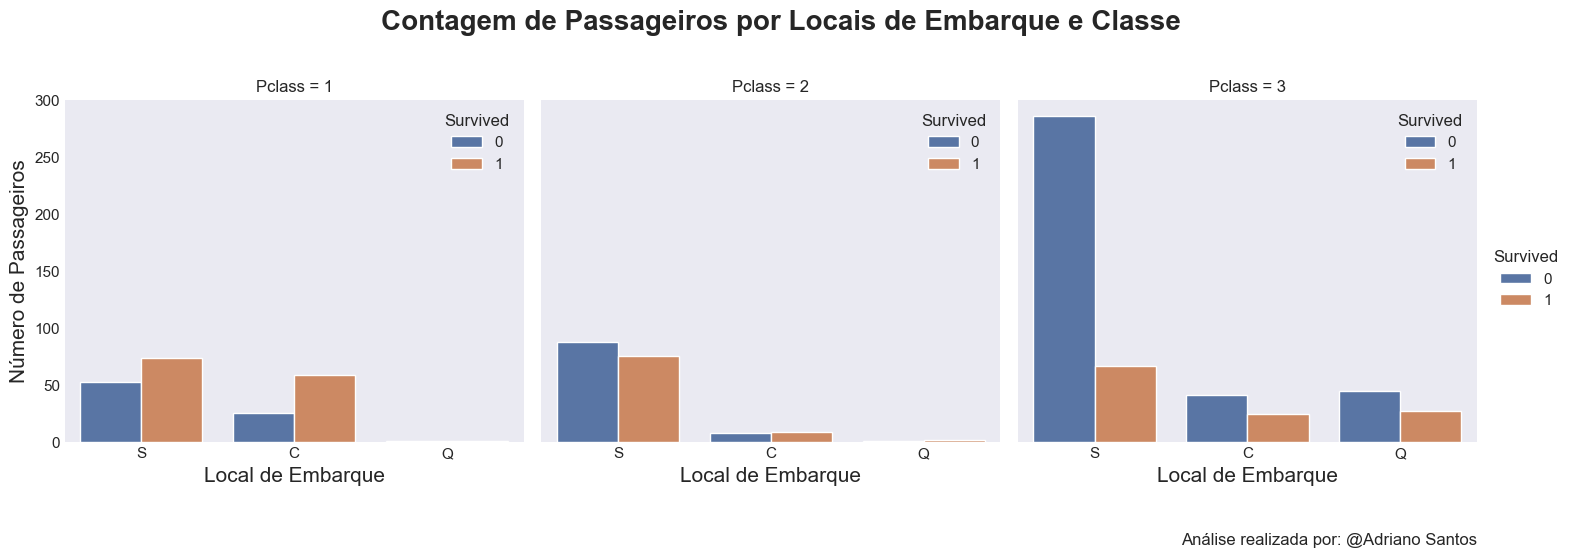

In [183]:

# Defina o tamanho do gráfico
plt.figure(figsize=(15, 8))

# Aplique um estilo
plt.style.use('seaborn-dark')

# Crie o gráfico
g = sns.catplot(x='Embarked', hue='Survived', kind='count', col='Pclass', data=train_df)

# Ajuste a altura do título
g.fig.subplots_adjust(top=0.8)

# Adicione o título
g.fig.suptitle('Contagem de Passageiros por Locais de Embarque e Classe', fontsize=20, fontweight='bold')

# Adicione rótulos aos eixos
g.set_xlabels('Local de Embarque', fontsize=15)
g.set_ylabels('Número de Passageiros', fontsize=15)

# Adicione a legenda em cada subplot
for ax in g.axes.flat:
    ax.legend(title='Survived')

# Adicione a legenda geral
plt.legend(title='Survived')

# Adicione uma anotação
plt.annotate(
    'Análise realizada por: @Adriano Santos',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12
)

# Exiba o gráfico
plt.show()

**Conclusão:** A maioria dos passageiros embarcou em S., onde os valores em falta pode ser preenchido com S. Maioria da terceira classe embarcaram a partir Q. A cidade S parece que ajudou os passageiros das primeira e segunda classes a sobreviver em comparação com a terceira classe.

### Analisando as distribuições de idade e valores das passagens dos passageiros com 'BoxPlot'

Neste código Python, estamos criando um gráfico com dois subplots (gráficos adjacentes) usando a biblioteca Matplotlib e Seaborn. O primeiro subplot exibe um BoxPlot da idade (Age) dos passageiros do conjunto de dados 'train_df', enquanto o segundo subplot exibe um BoxPlot do valor da passagem (Fare). Os BoxPlots são usados para visualizar a distribuição e dispersão dos dados. A anotação no canto inferior direito do gráfico identifica o autor da análise como @Adriano Santos. Por fim, o código exibe o gráfico resultante. Essa visualização ajuda a analisar as distribuições de idade e valores das passagens dos passageiros.

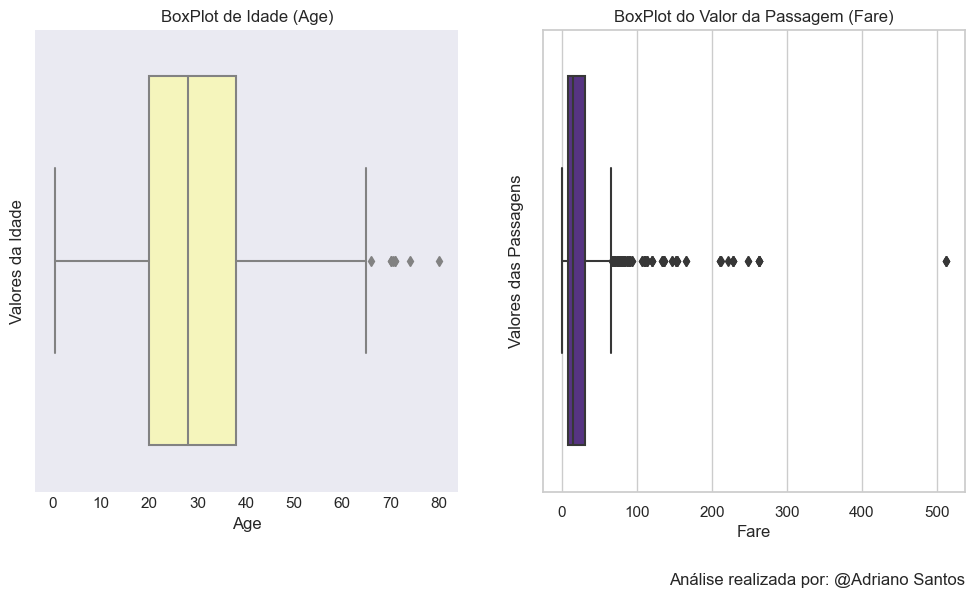

In [291]:

# Defina o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Gráfico 1: BoxPlot de Idade
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')  # Define o estilo da grade de fundo
sns.boxplot(x='Age', data=train_df, orient='v', color='#ffffb2')
plt.title('BoxPlot de Idade (Age)')
plt.ylabel('Valores da Idade')

# Gráfico 2: BoxPlot do Valor da Passagem
plt.subplot(1, 2, 2)
sns.set(style='whitegrid')  # Define o estilo da grade de fundo
sns.boxplot(x='Fare', data=train_df, orient='v', color='#54278f')
plt.title('BoxPlot do Valor da Passagem (Fare)')
plt.ylabel('Valores das Passagens')

# Adiciona uma anotação
plt.annotate(
    'Análise realizada por: @Adriano Santos',
    xy=(1, -0.20),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exiba o gráfico
plt.show()

### Analisando as distribuições de idade e valores das passagens dos passageiros

Neste código Python, estamos criando um gráfico com dois subplots, um ao lado do outro, usando a biblioteca Matplotlib. O primeiro subplot exibe um histograma da distribuição de idades (Age) do conjunto de dados 'train_df', dividido em 25 barras. O segundo subplot mostra um histograma da distribuição do valor da passagem (Fare) com 25 barras também. O código define títulos e rótulos apropriados para os gráficos. Além disso, ele inclui uma anotação no canto inferior direito com a informação "Análise realizada por: @Adriano Santos". Por fim, o comando 'plt.show()' é usado para exibir os gráficos.

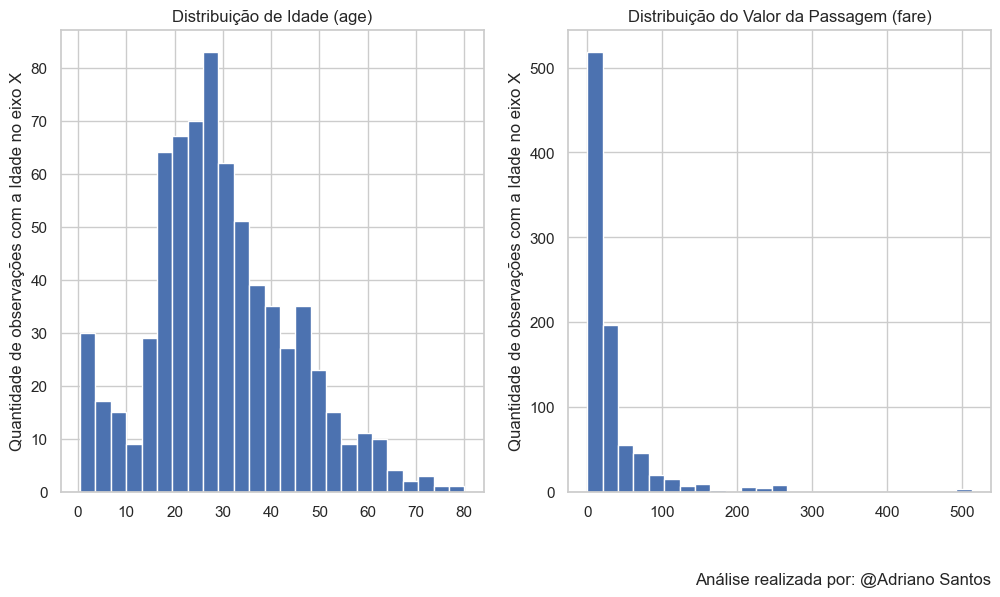

In [295]:

# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Plota o primeiro gráfico
plt.subplot(1, 2, 1)
train_df.Age.hist(bins=25)
plt.title('Distribuição de Idade (age)')
plt.ylabel('Quantidade de observações com a Idade no eixo X')

# Plota o segundo gráfico
plt.subplot(1, 2, 2)
train_df.Fare.hist(bins=25)
plt.title('Distribuição do Valor da Passagem (fare)')
plt.ylabel('Quantidade de observações com a Idade no eixo X')

# Adiciona uma anotação
plt.annotate(
    'Análise realizada por: @Adriano Santos',
    xy=(1, -0.20),
    xycoords='axes fraction',
    ha='right',
    fontsize=12
)

# Exibe o gráfico
plt.show()